count    20828.000000
mean        39.720424
std         10.120229
min         18.000000
25%         32.000000
50%         39.000000
75%         47.000000
max         71.000000
Name: EDAD, dtype: float64


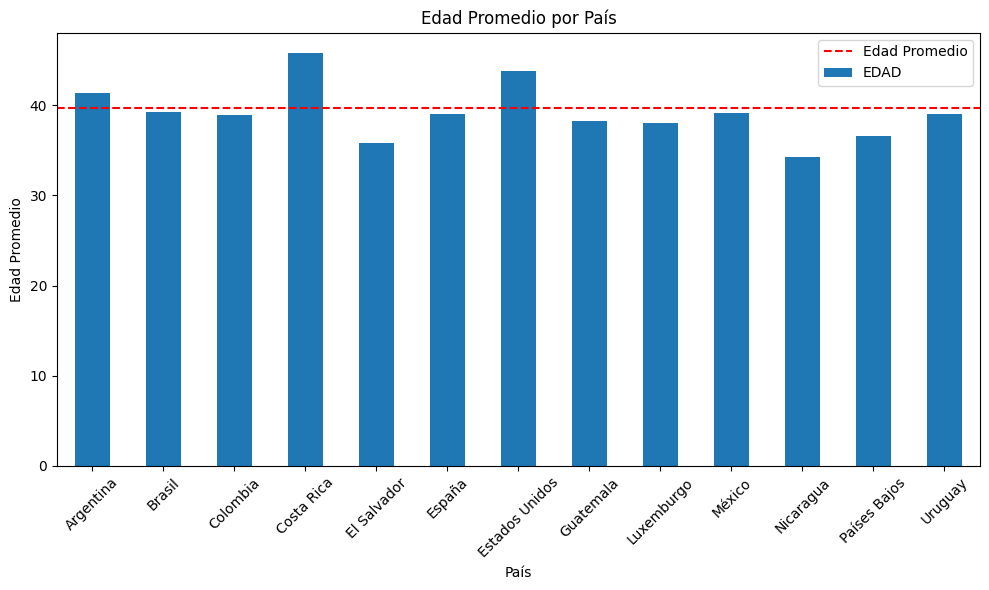

<Figure size 1000x600 with 0 Axes>

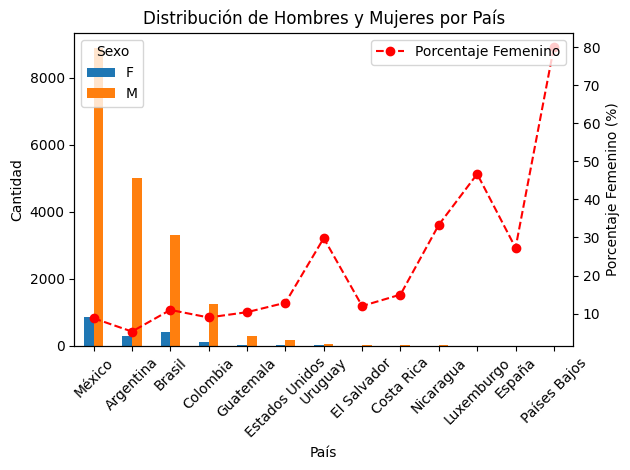

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
# Leer ruta del archivo
ruta_del_archivo = '/content/HC Jul23.xlsx'

# Leer el archivo .xls y almacenar los datos en un DataFrame
df = pd.read_excel(ruta_del_archivo)

# Mostrar las primeras filas del DataFrame para verificar la carga de datos
# print(data.head())

#Se Define la columna a trabajar y se escribe la funcion describe para obtener datos estadisticos de la edad de los trabajadores activos
column_name = 'EDAD'
column_stats = df[column_name].describe()
print(column_stats)

#Se instala libreria matplotlib
!pip install matplotlib

#Calcular la dedad promedio
edad_promedio =df['EDAD'].mean()

#Agrupar por pais y calcular la edad promedio
grupo_paises = df.groupby('RESUMEN UBICACIÓN GEOGRÁFICA')['EDAD'].mean()

#Crear el gráfico de barras
plt.figure(figsize=(10, 6))
grupo_paises.plot(kind='bar')
plt.axhline(y=edad_promedio, color='r', linestyle='--', label='Edad Promedio')
plt.xlabel('País')
plt.ylabel('Edad Promedio')
plt.title('Edad Promedio por País')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

#Mostrar el grafico
plt.show()

# Agrupar por país y sexo, luego contar el número de registros
grupo_pais_sexo = df.groupby(['RESUMEN UBICACIÓN GEOGRÁFICA', 'SEXO']).size().unstack()

# Calcular el porcentaje de trabajadores de sexo femenino sobre el total
grupo_pais_sexo['Porcentaje Femenino'] = grupo_pais_sexo['F'] / (grupo_pais_sexo['F'] + grupo_pais_sexo['M']) * 100


# Ordenar el DataFrame por la cantidad total de trabajadores
grupo_pais_sexo['Total Trabajadores'] = grupo_pais_sexo['F'] + grupo_pais_sexo['M']
grupo_pais_sexo = grupo_pais_sexo.sort_values(by='Total Trabajadores', ascending=False)

# Crear el gráfico de barras agrupadas (no apiladas) con ordenamiento
plt.figure(figsize=(10, 6))
ax1 = grupo_pais_sexo[['F', 'M']].plot(kind='bar')
ax2 = ax1.twinx()
ax2.plot(grupo_pais_sexo.index, grupo_pais_sexo['Porcentaje Femenino'], color='r', marker='o', linestyle='--', label='Porcentaje Femenino')
ax1.set_xlabel('País')
ax1.set_ylabel('Cantidad')
ax2.set_ylabel('Porcentaje Femenino (%)')
plt.title('Distribución de Hombres y Mujeres por País')
ax1.legend(title='Sexo', loc='upper left')
ax2.legend(loc='upper right')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()